# Melanoma Classification : Exploratory Data Analysis
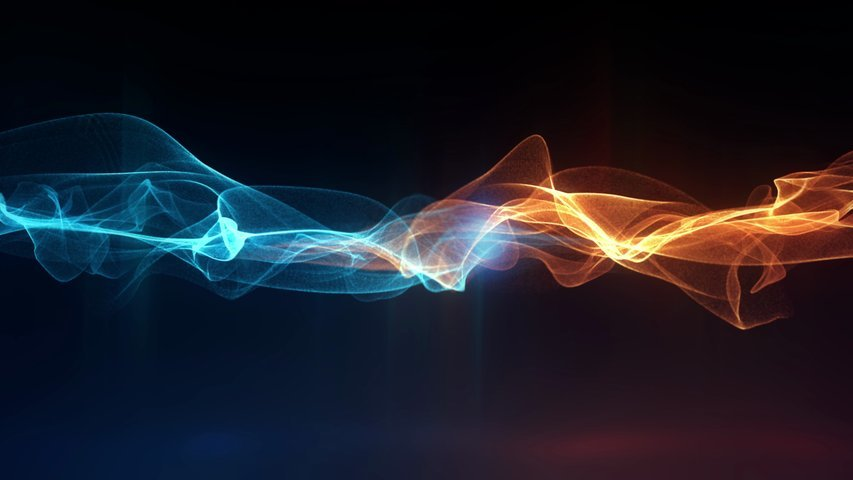 

## Notebook II of III

This notebook is the II one in my series of work in this competition. As always, shout out to amazing kernel authors present here at kaggle!! This notebook caters the area of Exploratory Data Analysis(EDA) used to derieve precious insights from the given dataset. 

## Previous works : 
* Dataset preparation(Notebook I) : 
**https://www.kaggle.com/fireheart7/melanoma-a-story-in-3-parts-part-one?scriptVersionId=38737538**

## Next in Line : 
* Preprocessing cum Model Development(Notebook III) : Link will be pasted here by tomorrow!

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(dirname)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import cv2
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

# Exploratory Data Analysis

When we’re getting started with a machine learning (ML) project, one critical principle to keep in mind is that data is everything. It is often said that if ML is the rocket engine, then the fuel is the (high-quality) data fed to ML algorithms. However, deriving truth and insight from a pile of data can be a complicated and error-prone job. To have a solid start for our ML project, it always helps to analyze the data up front. 

During EDA, it’s important that we get a deep understanding of: 

* The properties of the data, such as schema and statistical properties;
* The quality of the data, like missing values and inconsistent data types;
* The predictive power of the data, such as correlation of features against target.

In [ ]:
train = pd.DataFrame(pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/train.csv"))
test = pd.DataFrame(pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/test.csv"))

In [ ]:
train.shape, test.shape

So, there are around 33k training images and about 10k testing images

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.info()

In [ ]:
test.info()

## Inference : 

* Training set : Sex, age and anatomy_site have missing values.
* Test set : Anatomy_site have missing values.

We will take care of these further down in the notebook.

In [ ]:
len(train["patient_id"].unique()), len(test["patient_id"].unique())

## Inference : 

This means that out of 33,126 registered entries in the training set, only 2,056 are unique implying that some patients are diagnosed with multiple marks. 

Same goes for the test set where we have only 690 unique values out of collection of 10,982.

# Distribution Observation

In [ ]:
print(train["target"].value_counts())

## Malignant VS Benign cases - OVERALL

In [ ]:
malignant = len(train[train["target"] == 1])
benign = len(train[train["target"] == 0])

labels = ["Malignant", "Benign"] 
size = [malignant, benign]

plt.figure(figsize = (8, 8))
plt.pie(size, labels = labels, shadow = True, startangle = 90, colors = ["r", "g"])
plt.title("Malignant VS Benign Cases")
plt.legend()

Highly imbalanced dataset!!

## Male VS Female Count

In [ ]:
train_males = len(train[train["sex"] == "male"])
train_females  = len(train[train["sex"] == "female"])

test_males = len(test[test["sex"] == "male"])
test_females  = len(test[test["sex"] == "female"])

labels = ["Males", "Female"] 

size = [train_males, train_females]
explode = [0.1, 0.0]

plt.figure(figsize = (16, 16))
plt.subplot(1,2,1)
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90, colors = ["b", "g"])
plt.title("Male VS Female Training Set Count", fontsize = 18)
plt.legend()

print("Number of males in training set = ", train_males)
print("Number of females in training set= ", train_females)

size = [test_males, test_females]

plt.subplot(1,2,2)
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90, colors = ["b", "g"])
plt.title("Male VS Female Test Set Count", fontsize = 18)
plt.legend()

print("Number of males in testing set = ", test_males)
print("Number of females in testing set= ", test_females)

## Malignant male cases VS female cases

In [ ]:
train_malignant  = train[train["target"] == 1]
train_malignant_males = len(train_malignant[train_malignant["sex"] == "male"])
train_malignant_females  = len(train_malignant[train_malignant["sex"] == "female"])

labels = ["Malignant Male Cases", "Malignant Female Cases"] 
size = [train_malignant_males, train_malignant_females]
explode = [0.1, 0.0]

plt.figure(figsize = (10, 10))
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90, colors = ["r", "c"])
plt.title("Malignant Male VS Female Cases", fontsize = 18)
plt.legend()
print("Malignant Male Cases = ", train_malignant_males)
print("Malignant Female Cases = ", train_malignant_females)

## Benign male cases vs female cases

In [ ]:
train_benign  = train[train["target"] == 0]

train_benign_males = len(train_benign[train_benign["sex"] == "male"])
train_benign_females  = len(train_benign[train_benign["sex"] == "female"]) 

labels = ["Benign Male Cases", "Benign Female Cases"] 
size = [train_benign_males, train_benign_females]
explode = [0.1, 0.0]

plt.figure(figsize = (10, 10))
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90, colors = ["g", "y"])
plt.title("Benign Male VS Benign Female Cases", fontsize = 18)
plt.legend()
print("Benign Male Cases = ", train_benign_males)
print("Benign Female Cases = ", train_benign_females)

## Analysis of Cancer VS Sex

In [ ]:
cancer_versus_sex = train.groupby(["benign_malignant", "sex"]).size()
print(cancer_versus_sex)
print(type(cancer_versus_sex))

In [ ]:
cancer_versus_sex = cancer_versus_sex.unstack(level = 1) / len(train) * 100
print(cancer_versus_sex)
print(type(cancer_versus_sex))

In [ ]:
sns.set(style='whitegrid')
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":20,"axes.labelsize":18})   

plt.figure(figsize = (10, 6))
sns.heatmap(cancer_versus_sex, annot=True, cmap="icefire", cbar=True)
plt.title("Cancer VS Sex Heatmap Analysis Normalized", fontsize = 18)
plt.tight_layout()

## Analysis of Age VS Cancer : 

In [ ]:
sns.set(style='whitegrid')
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":20,"axes.labelsize":18})   

plt.figure(figsize = (10, 6))
sns.boxplot(train["benign_malignant"], train["age_approx"], palette="icefire")
plt.title("Age VS Cancer Boxplot Analysis")
plt.tight_layout()

## Inference : 

* The malignant cases belong to relatively higher age group.
* Age **might prove to be** a contributing factor in deciding whether the case is malignant or benign.
* From sex analysis we can hypothesize that sex **might be** a deciding factor as well. 

In [ ]:
print("################### Training set info ###################")
print(train["anatom_site_general_challenge"].unique())
print(train["anatom_site_general_challenge"].value_counts())

print("\n\n")

print("################### Test set info ###################")
print(test["anatom_site_general_challenge"].unique())
print(test["anatom_site_general_challenge"].value_counts())

In [ ]:
# train
train_torso = len(train[train["anatom_site_general_challenge"] == "torso"])
train_lower_extremity = len(train[train["anatom_site_general_challenge"] == "lower extremity"])
train_upper_extremity = len(train[train["anatom_site_general_challenge"] == "upper extremity"])
train_head_neck = len(train[train["anatom_site_general_challenge"] == "head/neck"])
train_palms_soles = len(train[train["anatom_site_general_challenge"] == "palms/soles"])
train_oral_genital = len(train[train["anatom_site_general_challenge"] == "oral/genital"])

# test
test_torso = len(test[test["anatom_site_general_challenge"] == "torso"])
test_lower_extremity = len(test[test["anatom_site_general_challenge"] == "lower extremity"])
test_upper_extremity = len(test[test["anatom_site_general_challenge"] == "upper extremity"])
test_head_neck = len(test[test["anatom_site_general_challenge"] == "head/neck"])
test_palms_soles = len(test[test["anatom_site_general_challenge"] == "palms/soles"])
test_oral_genital = len(test[test["anatom_site_general_challenge"] == "oral/genital"])

################# DISPLAY #################

labels = ["Torso", "Lower Extremity", "Upper Extremity", "Head/Neck", "Palms/Soles", "Oral/Genital"] 

plt.figure(figsize = (16, 16))

plt.subplot(1,2,1)
size = [train_torso, train_lower_extremity, train_upper_extremity, train_head_neck, train_palms_soles, train_oral_genital]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.1]
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90)
plt.title("Anatomy Sites In Training Set", fontsize = 18)
plt.legend()

plt.subplot(1,2,2)
size = [test_torso, test_lower_extremity, test_upper_extremity, test_head_neck, test_palms_soles, test_oral_genital]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.1]
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90)
plt.title("Anatomy Sites In Testing Set", fontsize = 18)
plt.legend()

# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

It seems like majority of the cases are observed at the torso, and after that the extremities of the body (upper/lower) in both the training and testing set. 

**However, the testing set has missing values as we previously explored.**

In [ ]:
train_ages_benign = train.loc[train["target"] == 0, "age_approx"]
train_ages_malignant = train.loc[train["target"] == 1 , "age_approx"]

plt.figure(figsize = (10, 8))
sns.kdeplot(train_ages_benign, label = "Benign", shade = True, legend = True, cbar = True)
sns.kdeplot(train_ages_malignant, label = "Malignant", shade = True, legend = True, cbar = True)
plt.grid(True)
plt.xlabel("Age Of The Patients", fontsize = 18)
plt.ylabel("Probability Density", fontsize = 18)
plt.grid(which = "minor", axis = "both")
plt.title("Probabilistic Age Distribution In Training Set", fontsize = 18)

# Getting Insights Into Images : 

Using the external dataset compiled in my previous notebook; we will explore various attributes related to our images in the training as well as test set.

*The dataset can be accessed at : https://www.kaggle.com/fireheart7/melanoma-image-insights* 

In [ ]:
train_image_stats_01 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_01"))
train_image_stats_02 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_02"))
train_image_stats_03 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_03"))
train_image_stats_04 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_04"))
train_image_stats_05 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_05"))
train_image_stats_06 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_06"))

print(train_image_stats_01.shape)
print(train_image_stats_02.shape)
print(train_image_stats_03.shape)
print(train_image_stats_04.shape)
print(train_image_stats_05.shape)
print(train_image_stats_06.shape)

Combining all the pieces in one dataframe.

In [ ]:
train_image_statistics = pd.concat([train_image_stats_01, train_image_stats_02, train_image_stats_03,
                                   train_image_stats_04, train_image_stats_05, train_image_stats_06],
                                  ignore_index = True)
train_image_statistics.shape

In [ ]:
train_image_statistics.info()

Similarily, working for the test dataframe.

In [ ]:
test_image_stats_01 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_test_01"))
test_image_stats_02 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_test_02"))

print(test_image_stats_01.shape)
print(test_image_stats_02.shape)

In [ ]:
test_image_statistics = pd.concat([test_image_stats_01, test_image_stats_02], ignore_index = True)

test_image_statistics.shape

In [ ]:
test_image_statistics.info()

In [ ]:
train_image_statistics.head()

In [ ]:
test_image_statistics.head()

## Let The Image Analysis Begin!!

We generate 4 random samples from the training data set. These 4 samples are taken from the aforementioned array of names.

In [ ]:
image_names = train_image_statistics["image_name"].values
random_images = [np.random.choice(image_names) for i in range(4)] # Generates a random sample from a given 1-D array
random_images 

## Sample Images

Earlier we extracted paths of all directories. So, we will access these images from there.

In [ ]:
train_dir = "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/"

In [ ]:
plt.figure(figsize = (12, 8))
for i in range(4) : 
    plt.subplot(2, 2, i + 1) 
    image = cv2.imread(os.path.join(train_dir, random_images[i]))
    # cv2 reads images in BGR format. Hence we convert it to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap = "gray")
    plt.grid(True)
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

# Analysis of color distribution

In [ ]:
benign_mean_red_value = []
benign_mean_green_value = []
benign_mean_blue_value = []

malignant_mean_red_value = []
malignant_mean_green_value = []
malignant_mean_blue_value = []

for image_name in tqdm(train_image_statistics["image_name"]) : 
    name = image_name[0:len(image_name)-4] # as .jpg are the appended at the end of the name
    extracted_section = train[train["image_name"] == name]
    r = int(train_image_statistics[train_image_statistics["image_name"] == image_name]["mean_red_value"])
    g = int(train_image_statistics[train_image_statistics["image_name"] == image_name]["mean_green_value"])
    b = int(train_image_statistics[train_image_statistics["image_name"] == image_name]["mean_blue_value"])
    if int(extracted_section["target"]) == 0 : # benign
        benign_mean_red_value.append(r)
        benign_mean_green_value.append(g)
        benign_mean_blue_value.append(b)
    else:
        malignant_mean_red_value.append(r)
        malignant_mean_green_value.append(g)
        malignant_mean_blue_value.append(b)

### Skewness in EDA : 

Skewness is the measure of symmetry or asymmetry of a data distribution.
A distribution or data set is said to be symmetric if it looks same to the left and right point of the center. 

#### `Types of Skewness` : 

Skewness is generally classified into 2 broad categories-
* Right skewness or Positive skewness
* Left skewness or Negative skewness

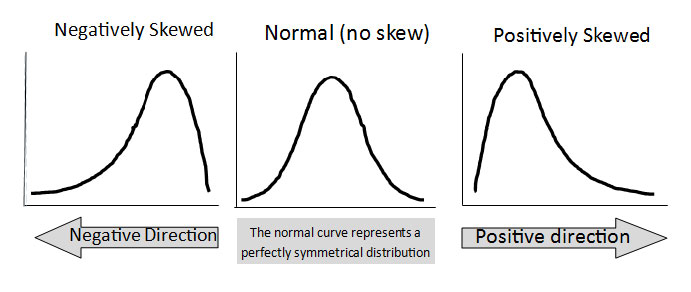

### Kurtosis : 

Kurtosis is the characteristics of being flat or peaked. It is a measure whether data is heavy- tailed or light-tailed in a normal distribution

A large kurtosis value often mean that the tails of the distributions are getting toward more extreme values than the tails of normal distributions. This may lead to a length of 6 or 7 standard deviation from the mean. Similarly, If the kurtosis value is very low, then the tails of the distributions will be less lengthier than the those of a normal distribution (less than 3 standard deviation).

A large value of kurtosis is often considered as more risky because data may tend to give an outlier value as outcome with greater distance from the mean if applied to any machine learning algorithm.

### `Types of Kurtosis` :

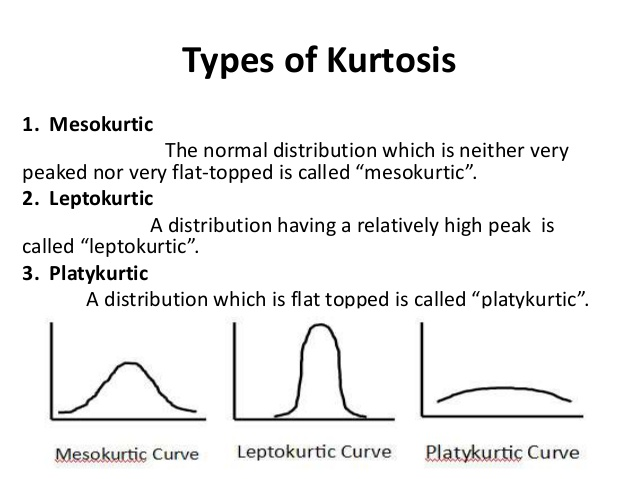

It is very difficult to interpret and analyse the data which is skewed. 

### `Some Transformations for highly skewed data` :

We can perform a number of transformations so that the data information remains preserved while at the same time some symmetric nature starts developing in its distribution. 

* Taking the square root of each data point and plotting it again.
* Taking the cube root of each data point and plotting it again.
* Taking the logarithm of each data point and plotting it again.
* Taking the reciprocal of each data point and plotting it again.

Channel plotting

In [ ]:
#red channel plot
range_of_spread = max(benign_mean_red_value) - min(benign_mean_red_value)

plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(benign_mean_red_value, hist = True, kde = True, label = "Mean Red Channel Intensities", color = "r")
fig.set(xlabel = "Mean red channel intensities observed in each image",
        ylabel = "Probability Density")
plt.title("Spread Of Red Channel In Benign Cases", fontsize = 18)
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

In [ ]:
#green channel plot
range_of_spread = max(benign_mean_green_value) - min(benign_mean_green_value)

plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(benign_mean_green_value, hist = True, kde = True, label = "Mean Green Channel Intensities", color = "g")
fig.set(xlabel = "Mean green channel intensities observed in each image",
        ylabel = "Probability Density") 
plt.title("Spread Of Green Channel In Benign Cases", fontsize = 18)
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

In [ ]:
#Blue channel plot
range_of_spread = max(benign_mean_blue_value) - min(benign_mean_blue_value)

plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(benign_mean_blue_value, hist = True, kde = True, label = "Mean Blue Channel Intensities", color = "b")
fig.set(xlabel = "Mean blue channel intensities observed in each image",
        ylabel = "Probability Density") 
plt.title("Spread Of Blue Channel In Benign Cases", fontsize = 18)
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

In [ ]:
plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(benign_mean_blue_value, hist = False, kde = True, label = "Mean Blue Channel Intensities", color = "b")
fig = sns.distplot(benign_mean_red_value, hist = False, kde = True, label = "Mean Red Channel Intensities", color = "r")
fig = sns.distplot(benign_mean_green_value, hist = False, kde = True, label = "Mean Green Channel Intensities", color = "g")

fig.set(xlabel = "Mean channel intensities observed in each image",
        ylabel = "Probability Density") 
plt.title("Spread Of Channels In Benign Cases", fontsize = 18)
plt.legend()

Malignant Cases 

In [ ]:
# free up the memory
del benign_mean_red_value
del benign_mean_green_value
del benign_mean_blue_value

In [ ]:
import gc
gc.collect()

In [ ]:
plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(malignant_mean_blue_value, hist = False, kde = True, label = "Mean Blue Channel Intensities", color = "b")
fig = sns.distplot(malignant_mean_red_value, hist = False, kde = True, label = "Mean Red Channel Intensities", color = "r")
fig = sns.distplot(malignant_mean_green_value, hist = False, kde = True, label = "Mean Green Channel Intensities", color = "g")

fig.set(xlabel = "Mean channel intensities observed in each image",
        ylabel = "Probability Density") 
plt.title("Spread Of Channels In Malignant Cases", fontsize = 18)
plt.legend()

So, we observe that in both the cases the component of red spikes the most, whereas Blue and Green are close to each other. All the channels also appears to be a bit negatively skewed. 

`**Hence, the channel distribution won't be a powerful feature to differentiate between the malignant and benign cases.**`

Kutosis of this distribution is manageable. 

In [ ]:
gc.collect() # free up the memory

# Dealing with missing values : 

Filling the areas of missing values in the dataframe.

In [ ]:
train.head()

Sex feature column

In [ ]:
# visualizing missing values in "sex" column

missing = len(train[train["sex"].isna() == True])
available = len(train[train["sex"].isna() == False])

x = ["Availabe data", "Unavailable data"]
y = [np.log(available), np.log(missing)] # plotting log data as the extreme values will supressed and lower ones will shoot, making it eay to visualize

print("Count of missing data = ", missing)
print("Count of available data = ", available)

plt.figure(figsize = (12, 8))
plt.subplot(1,1,1)
plt.barh(x, y, color = "m")
plt.grid(True)
plt.title("Data On Patient's Sex")

In the starting part of EDA, we saw that the male gender dominated the gender count slightly. So, we fill the missing values with the dominant gender in the dataset. 

In [ ]:
train["sex"].fillna("male", inplace = True)

Age feature column

In [ ]:
missing =  len(train[train["age_approx"].isna() == True]) 
available = len(train[train["age_approx"].isna() == False]) 

print("Missing age values = ", missing)
print("Available age data = ", available)

x = ["Availabe data", "Unavailable data"]
y = [np.log(available), np.log(missing)] # plotting log data as the extreme values will supressed and lower ones will shoot, making it eay to visualize

plt.figure(figsize = (12, 8))
plt.subplot(1,1,1)
plt.barh(x, y, color = "y")
plt.grid(True)
plt.title("Data On Patient's Age")

This is similar to the sex distribution part.

We know so far 

* Males are relatively dominant in count in the dataset
* Torso, lower extremity and upper extremity corresponds to more than 70% of overall locations(initial EDA steps)
* Number of malignant cases are far less than benign, and then also they male count dominates in both. 

Therefore, we fill the missing values with the median data at the union of the aforementioned cases. Let's see how...

In [ ]:
# train
anatomy_sites = ["torso", "upper extremity", "lower extremity"]

# first select the relevant part of the full dataframe satisfying either of the aforementioned three conditions.
relevant_dataframe_part = train[(train["sex"] == "male") &
                     (train["anatom_site_general_challenge"].isin(anatomy_sites)) &
                     (train["target"] == 0)]

# Now, we have the data frame. To calculate median, we need to specify the column along which we intend to calculate the median.
median_value = relevant_dataframe_part["age_approx"].median()

print("Median value = ", median_value)

In [ ]:
train["age_approx"].fillna(median_value, inplace = True)

Anatomy feature column

We simply replace the missing values(if any) with "TORSO" class, as it is the dominant one here.

In [ ]:
train["anatom_site_general_challenge"].fillna("torso", inplace = True)
test["anatom_site_general_challenge"].fillna("torso", inplace = True)

In [ ]:
train.info()

In [ ]:
test.info()

So, now we have dealt with missing values!!! :-)

## Save these so that we can use these updated CSV files in the next notebook where we tackle preprocessing and model creation.

In [ ]:
train.to_csv("updated_training_file", index = False)
test.to_csv("updated_test_file", index = False)

## Gaining more insights from the images : 

Let's analyze the information presented by the *melanoma-image-insights* dataset.

Shape related information : 

In [ ]:
plt.figure(figsize = (15, 8))

plt.subplot(1,2,1)
x = train_image_statistics["rows"]
y = train_image_statistics["columns"]
plt.scatter(x, y, cmap = "magma")
plt.title("Shape Analysis Of Training Images", fontsize = 18)
plt.xlabel("Number Of Rows", fontsize = 18)
plt.ylabel("Number Of Columns", fontsize = 18)

plt.subplot(1,2,2)
x = test_image_statistics["rows"]
y = test_image_statistics["columns"]
plt.scatter(x, y, cmap = "magma")
plt.title("Shape Analysis Of Testing Images", fontsize = 18)
plt.xlabel("Number Of Rows", fontsize = 18)
plt.ylabel("Number Of Columns", fontsize = 18)


plt.tight_layout()

It's a tad difficult to analyze like this! Therefore we'll plot them in one.

In [ ]:
plt.figure(figsize = (12, 8))

x = train_image_statistics["rows"]
y = train_image_statistics["columns"]
plt.scatter(x, y, cmap = "plasma", label = "Training Image")
plt.title("Shape Analysis", fontsize = 18)

x = test_image_statistics["rows"]
y = test_image_statistics["columns"]
plt.scatter(x, y, cmap = "magma", label = "Testing Image")

plt.xlabel("Number Of Rows", fontsize = 18)
plt.ylabel("Number Of Columns", fontsize = 18)
plt.legend()

We observe that most common dimension in training and testing set's intersection is 1800 X 1800 to 2500 X 2500. We will reshape the images accordingly later in the preprocessing segment.

Let's analyze Image mean, standard deviation and skewness with one another. For this we will use plotly's express. Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

mpltoolkit can also be used if you are adamant using matplotlib.

In [ ]:
train_image_statistics.head()

In [ ]:
fig = go.Figure(data = [go.Scatter3d(x = train_image_statistics["image_mean"],
                                    y = train_image_statistics["image_standard_deviation"], 
                                   z = train_image_statistics["image_skewness"],
                                    mode = "markers",
                                    marker = dict(size = 4, color = train_image_statistics["rows"],

                                                  colorscale = "jet", opacity = 0.4))] , 
               
                layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0),
                                   scene = dict(xaxis = dict(title='Image Mean'),
                                                yaxis = dict(title='Image Standard Deviation'),
                                                zaxis = dict(title='Image Skewness'),),))
fig.show()

Repeating for the test data : 

In [ ]:
fig = go.Figure(data = [go.Scatter3d(x = test_image_statistics["image_mean"],
                                    y = test_image_statistics["image_standard_deviation"], 
                                   z = test_image_statistics["image_skewness"],
                                    mode = "markers",
                                    marker = dict(size = 4, color = test_image_statistics["rows"],

                                                  colorscale = "jet", opacity = 0.4))] , 
               
                layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0),
                                   scene = dict(xaxis = dict(title='Image Mean'),
                                                yaxis = dict(title='Image Standard Deviation'),
                                                zaxis = dict(title='Image Skewness'),),))

fig.show()

## Reached the end! 

Thank you for reading this far. That's it so far in EDA. Now, we dive into the most exciting part of the ML world, that is Model construction and pre-processing.

**Link :**  Will be here by tomorrow!

## In case you haven't explored the previous book where custom dataset creation is discussed : 

**Link** : **https://www.kaggle.com/fireheart7/melanoma-a-story-in-3-parts-part-one?scriptVersionId=38737538**

## Do upvote folks if you find it useful! Keeps me motivated to learn and explore more!

## This notebook will be updated from here on!